## **0. Data Load**

In [ ]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy.stats import norm

In [ ]:
# 인코딩된 최종 데이터셋으로 load
business = pd.read_csv("your_path")
review = pd.read_csv("your_path")
# user = pd.read_csv("/content/drive/MyDrive/ASAC/00_project/CORP/Dataset/user_encoding.csv")

## **1. YAKE!**
* statistical based unsupervised model
* using local text features, multi-lingual keyword

In [ ]:
! pip install git+https://github.com/LIAAD/yake

In [ ]:
import yake
from yake import KeywordExtractor

In [ ]:
# extractor 함수화
def kw_extractor(text, n_gram, wd, k, thres, func=None, stopword=None):
    # 기본 파라미터
    param = {'lan': 'en', 'n': n_gram, 'dedupLim': thres, 'windowsize': wd, 'top': k}

    # stopword가 있는 경우 추가
    if stopword is not None:
        param['stopwords'] = stopword

    # func가 있는 경우 추가
    if func is not None:
        param['dedupFunc'] = func

    # yake.KeywordExtractor 초기화
    extractor = yake.KeywordExtractor(**param)

    # 키워드 추출
    keywords = extractor.extract_keywords(text)

    return keywords

### 리뷰 키워드 추출 시도
* 리뷰 데이터 중 가장 길이가 긴 리뷰 텍스트로 시도

In [ ]:
# Try 1) text 길이 가장 긴 review : 4,999자
text = """
I will never go back  to guppys again. After the scene the Bartender John caused last Sunday, it is a disgrace. Story below. This is also not the first of these stories I have heard from numerous people.

My three friends and I arrived to Guppys and walked into the bar area. We were greeted by the bartender (not John) and asked what we wanted to drink. I did not order the beverages, my friends sitting at the bar did. We received four beers and walked to the back area to get a little more room. While we were near the back, we saw a table with four empty chairs outside. Since it was nice out, we went out and sat down. We talked to the couple behind us with their dog, very friendly. We were out there for maybe 10-15 minutes and had not seen one bartender or server pass us. We just sipped out drinks and chatted. I received a phone call and took it at the table, outside. About two minutes into my phone call, John comes out and asks if we are ordering food. We said no and he then proceeds to tell me we need to order food to sit at the table. Understandable, so i asked for menus. He brought out menus and not even 5 minutes later asked what we had wanted. Since i was still on the phone and my friends were talking, we hadn't taken a good look at the menu yet.. I ordered 2 appetizers immediately so we can have a bit more time to look. When i ordered the two, John comes back and tells me "no, you need to have one item per person." Now, what i don't understand is why i need one appetizer per person. They are appetizers and meant to be shared. I complied and ordered four appetizers. He corrected me to tell me i only had mentioned three. My friend now has chimed in and with my phone call who heard me says " no she ordered four" and listed them again. John was obviously annoyed and went back in. He came back after 2-3 minutes to tell me then that I was too drunk to be there and we all had to leave. He proceeded to take all of my friends beers from them. We had already paid for these beers and they were MAYBE 1/3 of the way finished. That is it. He didn't take mine and i told him, we already paid and I"m no where near drunk. I also said i ordered the food you asked me to. He then goes to say you are so drunk you don't even know what beer you have and then asked me to name my beer. I didn't order the beers, my friend did. I've know him for 20 years and trust his beer choice. So now I'm EXTREMELY  embarrassed. He went in, got my friends card, came out and said you were not charged you now need to leave. All of this was EXTREMELY humiliating, especially because i had had 2 beers since 11am being that i was the driver that night. So i was not drunk and I was VERY willing to order the food amount asked, even though you cant MAKE someone order a plate per person. He was very rude and condescending putting on a scene.

We left and as soon as we were across the street, a table of four ladies were sat.

I was so distraught and annoyed that i was kicked out for doing what was asked. We were just at guppys the weekend prior and were around EXTREMELY drunk people. We love going there so i didn't get it. I decided to go back to talk to a manager and see what and why i was singled out and humiliated.

My friend and i walked back to Guppys. We walk in and John is still behind the bar. The place was not busy at all. I went up to John and asked for a manager. He said he was the manager. So i asked why that incident happened. He claims again that I'm drunk and was slurring my words. He said we were drunk when we got there and too drunk to stay. IF this is the case, why were we served? When I asked him this, his answer was it wasn't him that served us. SO as acting manager, he CLEARLY was in the wrong then. Also, if we were so drunk by his standards, why did he tell me to order food, order more food than i had to, and make a scene of kicking of out of the bar? I asked this as well, he then changed his story to tell me he got two noise complaints from each table next to us. This isn't true, we A ) were not there long enough to be doing anything B) NO sever or bartender had come outside and C) the couple behind us we were chatting with perfectly find and had not left the table the entire 10-15 minutes we were there. So, now when i ask him this and tell him we were friendly with the  couple, he asked me to say her name. I didn't know her name because i don't always need someones name to have a friends conversation with. He is now INTENTIONALLY embarrassing me again and in front of another (obviously drunk) customer at the bar. I also asked when i ordered food, why did you change your mind again. He said i needed to order 1 main entree per person and i didn't. he NEVER said that nor is that a rule. Also, i ordered four appetizer $10-$13 each, which VERY WELL could have been a meal per person. He told us we needed to leave and i asked for the managers name and number. He was clearly annoyed with that but got information and scribbled it down.
"""

keywords = kw_extractor(text, 3, 4, 20, 0.7)
keywords_df = pd.DataFrame(keywords)
keywords_df

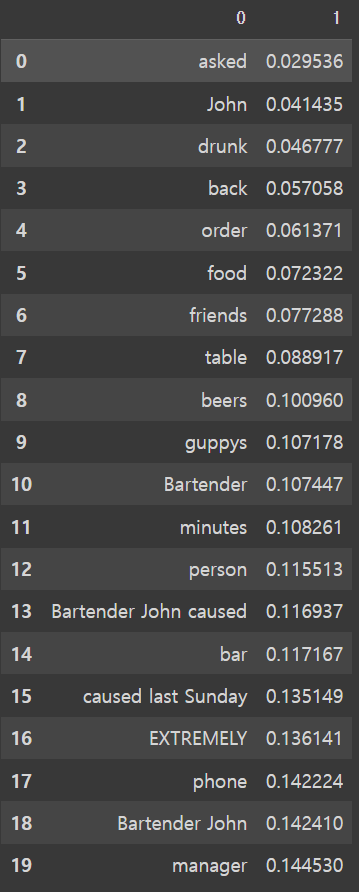

In [ ]:
# Try 2) 그 다음
text = """
This will be a long as the situation I was placed in was so upsetting I feel it warrants a total explanation.
I called 3 weeks in advance to make an appt & obtained a quote from Mike to replace my timing belt-about 4 hrs and $400. This was $400 less than the quote I had received in my town. I was told that they needed the car all day because of the extensiveness of the work to be done and they closed at 4 on Saturdays so we made the appointment for 10. I told him I would be driving 3 hrs to Reno to stay the night before and that I needed to have it done that day because I would be driving home the next day. At this point, there was never any recommendation that I get a Timing Belt Tensioner or Water Pump done on the car as well. My car had over 100K miles on it and all I knew was that you're supposed to replace the belt so it doesn't break and ruin your engine.
I drove up with some friends to Tahoe and dropped the car off at the shop at 10 am the next day while my friends went skiing. I was told again, that it would take about 4 hrs to do all the work. I asked if they would call me if there were any problems and when it was done. I went in to town to wait for my car.
At 2:30 I called the shop, as I had not received a phone call. I was then told that they recommend replacing the Tensioner and Water Pump while they're already in replacing the Timing Belt. I inquired as to how much longer that would take-knowing I needed to get my friends so we could drive the 3 hrs home. 30 mins later I received a call back from the shop with an estimate-it was going to be another $350 and I was told it takes about 30 mins extra to do the work. Not planning on having to spend $750 on replacing my Timing Belt (and wondering if the $800 estimate I got in my town included all of this), I was a little reluctant. They called me back 5 mins later, which gave me time to research online and find out that you should replace all the parts together, so I agreed. This was just after 3. Knowing they closed in an hour, I assumed it would just take the additional 30 mins to complete my car.
At 5:10 I called them. I knew they closed at 4 and was confused as to why I hadn't heard from them. At 5:40, I got to the shop and was told my car was not done. I made it clear that I needed my car, as I had people in Tahoe waiting on me and that we had to go back home for work the next day. I was then told about a parts mix up. Apparently, the parts place had brought over a "Kit", containing the Tensioner and Water Pump and that there was no Tensioner in it-not once but twice. So the shop was then unable to find a Tensioner for my car, I assume partly because it was too late for most part stores to be open. They wanted to keep my car until Monday which I couldn't do because of all the people I had waiting on me and I'd be stuck in Reno for 2 more days. At this point, I just wanted my car back and told them I didn't care if the work was done or not. I was informed that my car was apart and that they had already done the Belt and I believe the Pump. So they asked if I wanted the car back without a new Tensioner and I told them I guess I had no choice.
After 20 mins, Mike informed me that they were almost done with another lady's car because there was a parts issues with her car as well and that mine would take 30 mins after they completed hers. I started feeling very anxious as I felt trapped there. Another hour went by and they still weren't done with her car. I kept explaining that I had people waiting on me and that I needed my car, but apparently they weren't going to work on my car until they finished hers (she was local and rode her bike there). I then questioned Mike as to why, if it is standard practice to replace them all at the same time, would they wait until they've had the car for 4  1/2 hrs and the work was supposed to be done before asking me if I wanted to replace items that weren't broken but, like the belt, should be replaced before they break? I questioned him as to why they didn't already have the parts there since they knew I was coming in from out of town to have the work done. It seemed very unprofessional and irresponsible. They didn't even call me to ask me, I had to call them after 4  1/2 hrs. If I had said no to those repairs, I would have gotten my car and been on my way, but they made it sound like it would take only 30 mins more to have the car done. At 8 they were just finishing with the other lady's car. At this point, I asked them to be honest with me and let me know exactly how long it would take to finish my car-again 30 mins. By 9, I was feeling sick to my stomach as I started feeling like I was being held hostage there. I had no way to leave as my car was still apart. My anxiety level was very high. At 10:45, after 13 hours, I finally got my car back-no tensioner, no discount (and no response to my numerous emails later). This was in Jan and I'm STILL upset. Absolutely awful experience and customer service.
"""
keywords = kw_extractor(text, 3, 3, 20, 0.5)
keywords_df = pd.DataFrame(keywords)
keywords_df

* threshold는 중복성 제거를 위해 작게 설정할수록 유의미하다고 판단
* 단순 n-gram keyword 추출만으로는 긍/부정 여부 알기 어려움

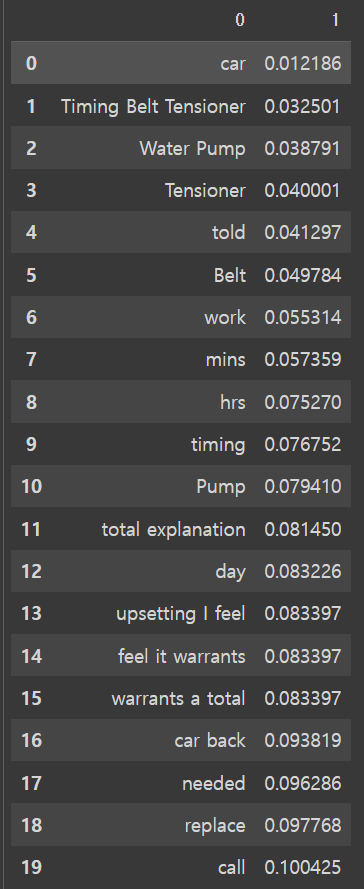

### stopwords 적용 전후 비교

In [ ]:
# YAKE stopoword 파일 그대로 가져와보기
# https://github.com/LIAAD/yake/tree/master/yake/StopwordsList
# --> language별로 stopword list 제공

path = "your_path"  # 우선 english stopword txt파일만 불러옴
with open(path, 'r', encoding='utf-8') as file:
    stopwords = file.readlines()
stopwords_list =  [word.strip() for word in stopwords]  # 줄바꿈 기호 제거
len(stopwords_list)

In [ ]:
# 비교표 시각화 함수
def compare_rank(keywords_default,keywords_with_stop):
  fig, ax = plt.subplots(figsize = (12,8.5))
  data = []
  for idx, (no, yes) in enumerate(zip(keywords_default, keywords_with_stop), 1):
      data.append([idx, no[0], round(no[1], 4), yes[0], round(yes[1], 4)])
  column_labels = ["Index", "Keyword_Default", "Score_Default", "Keyword_With_Stopwords","Score_With_Stopwords"]
  ax.axis("tight")
  ax.axis("off")
  table = ax.table(cellText=data, cellLoc="center", colLabels=column_labels ,loc = "center")
  table.auto_set_font_size(False)
  table.set_fontsize(12)
  table.scale(1.2, 1.8)

  # 컬럼명 볼드처리
  for key, cell in table.get_celld().items():
      if key[0] == 0:
          cell.set_text_props(weight='bold')
          cell.set_facecolor('#ADD8E6')

  # 칸 크기 조정
  table.auto_set_column_width([0])
  col_widths = [0.1, 0.3, 0.2, 0.3, 0.2]
  for col, width in zip(range(5), col_widths):
      table.auto_set_column_width([col])
      for key, cell in table.get_celld().items():
          if key[1] == col:
              cell.set_width(width)

  # 짝수 행마다 배경색 설정
  for key, cell in table.get_celld().items():
      if key[0] != 0 and key[0] % 2 == 0:
          cell.set_facecolor('#EAEAEA')

  plt.title("YAKE Keyword Extraction Comparison", fontsize=16, weight ="bold")
  return plt.show()

In [ ]:
# 임의로 불용어 추가해보기
combined_stopwords = stopwords_list + ["day","mins","told","needed","hrs","work","done"]

keywords_default = kw_extractor(text, 3, 3, 20, 0.5, 'leve')
keywords_with_stop = kw_extractor(text, 3, 3, 20, 0.5, 'leve', combined_stopwords)
compare_rank(keywords_default,keywords_with_stop )

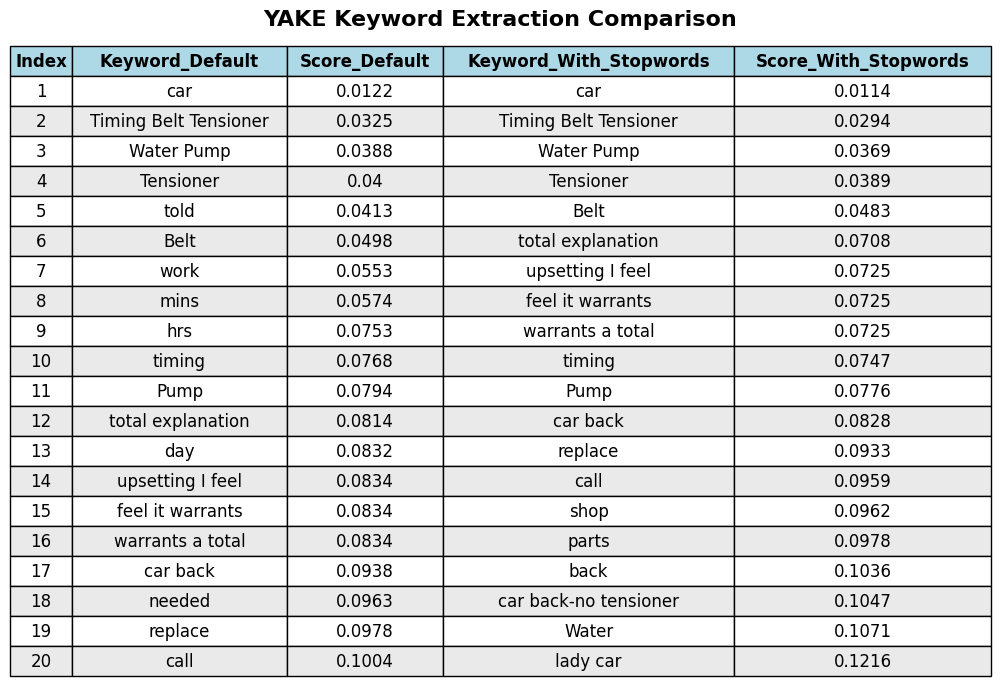

In [ ]:
def rank_line(keywords_default, keywords_with_stop )
  # 공통 단어 추출
  df_default = pd.DataFrame(keywords_default, columns = ['word','score'])
  df_stop = pd.DataFrame(keywords_with_stop, columns = ['word', 'score'])

  common = set(df_default['word']).intersection(set(df_stop['word']))

  df_def_common = df_default[df_default["word"].isin(common)].reset_index(drop=True)
  df_stop_common = df_stop[df_stop["word"].isin(common)].reset_index(drop=True)

  # rank
  df_def_common["rank"] = df_def_common.index + 1
  df_stop_common["rank_stop"] = df_stop_common.index + 1

  df_common_rank = pd.merge(df_def_common[["word","rank"]], df_stop_common[["word","rank_stop"]], on="word")
  df_common_rank_cg = df_common_rank[df_common_rank["rank"]!=df_common_rank["rank_stop"]]

  # 순위 변동 그래프
  plt.figure(figsize = (8, 8))
  palette = sns.color_palette("twilight", len(df_common_rank_cg))

  for i, (_, row) in enumerate(df_common_rank_cg.iterrows()) :
    plt.plot([0,1], [row['rank'], row['rank_stop']], marker='o', label = row['word'], color = palette[i], linewidth=2)

  plt.xticks([0, 1], ['Defalut Stopwords', 'Personal Stopwords'], fontsize = 12)
  plt.xlabel('List Type',fontsize=14)
  plt.ylabel('Rank',fontsize=14)
  plt.title('Keyword Rank Changes Between Two Lists', fontsize = 18, weight = "bold")

  plt.gca().invert_yaxis() # y축 역순

  for _, row in df_common_rank_cg.iterrows():
    plt.text(1, row['rank_stop'], row['word'], horizontalalignment= 'left', verticalalignment='bottom', fontsize = 11)
  plt.grid(True)

  return plt.show()

In [ ]:
rank_line(keywords_default,keywords_with_stop)

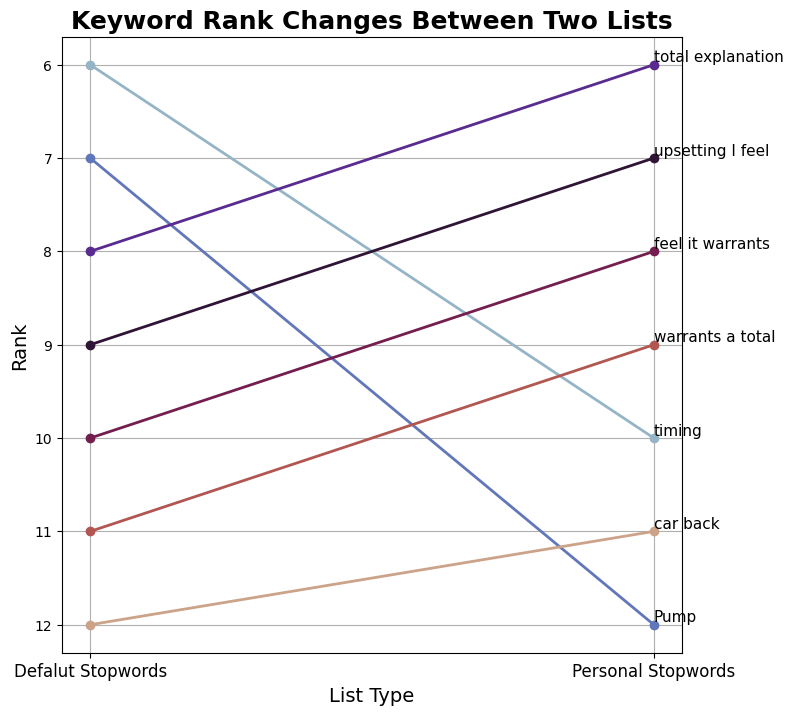

### 대소문자 텍스트 score 비교
* YAKE는 keyword scoring 시 UPPER CASE의 경우 더 중요한 텍스트로 가정하여 높은 점수를 부여함
* 실제 대문자를 포함하여 작성된 리뷰를 소문자로 변환한 버전과 비교

In [ ]:
# 그냥 df 합치기
def concat_pd(keywords_1, keywords_2) :
  df_1= pd.DataFrame(keywords_1, columns = ['word','score'])
  df_2 = pd.DataFrame(keywords_2, columns = ['word', 'score'])
  df_concat = pd.concat([df_1, df_2],axis=1)
  return df_concat

In [ ]:
text_upper = """
AWFUL EXPERIENCE, DO NOT CHOOSE THIS HOTEL!

BE CAREFUL! THEY STEAL YOUR MONEY! NOT A SAFE HOTEL!

We did not get the room cleaned in our stay

It was a huge fight  between the housekeeping memebers screaming loudly outside the room guests without any consideration and ethics. It was in the morning! How awful to wake up with those Screamings. I have never seen a fight like that.. Awful
911 had to arrive later.

Housekeeping did a mess by drop coffee and cups. So after the check out my family and me were accused of that and also of scratch the walls and also accused for dropping the towels on the floor (that is the Only thing we did)

Did housekeeping did those scratches and drop the coffe to accuse us for revenge as we complaint about that we did no get the housekeeping service? Or Maybe they thought i  accused us about the fight as i got out of my room to take breakfast and they were all there in front of me.

Or did the scratches were from other guest who had a kid and accused us... Adding the coffee on the floor in purpose?

I dont know why they did that but they charge 500 dollars.
In the beginning was 250 but after we complaint to the general manager she added 250 more...

The manager assistant was extremely rude. When we arrived so confused and worried of why that happened he treated us so bad threatening us to call the POLICE. My parents who are senior were also threatened. My dad has a heart condition and my Mother hypertense. It was Only ny wrote making the complaint and the rest of us in silence.
We had to leave becauase we did not want to frustate more my parents in such a special Day CHRISTMAS and as my dad was getting very stressed and affected .
I think the manager assistant was covering something up as he was very nervous and angry when he talked like in a defensive way. I remw
"""
# 소문자 변환
text_lower = text_upper.lower()

In [ ]:
keywords_upper = kw_extractor(text_upper, 3,3,20, 0.6, 'leve')
keywords_lower = kw_extractor(text_lower, 3,3,20, 0.6, 'leve')
concat_pd(keywords_lower, keywords_upper)

* 같은 keyword임에도 대문자로 인식된 텍스트가 더 중요한 것으로 인식됨(score 낮을수록 중요도 up)
* keyword_upper에서는 대문자 keyword들이 상위권에 몰려있음을 확인

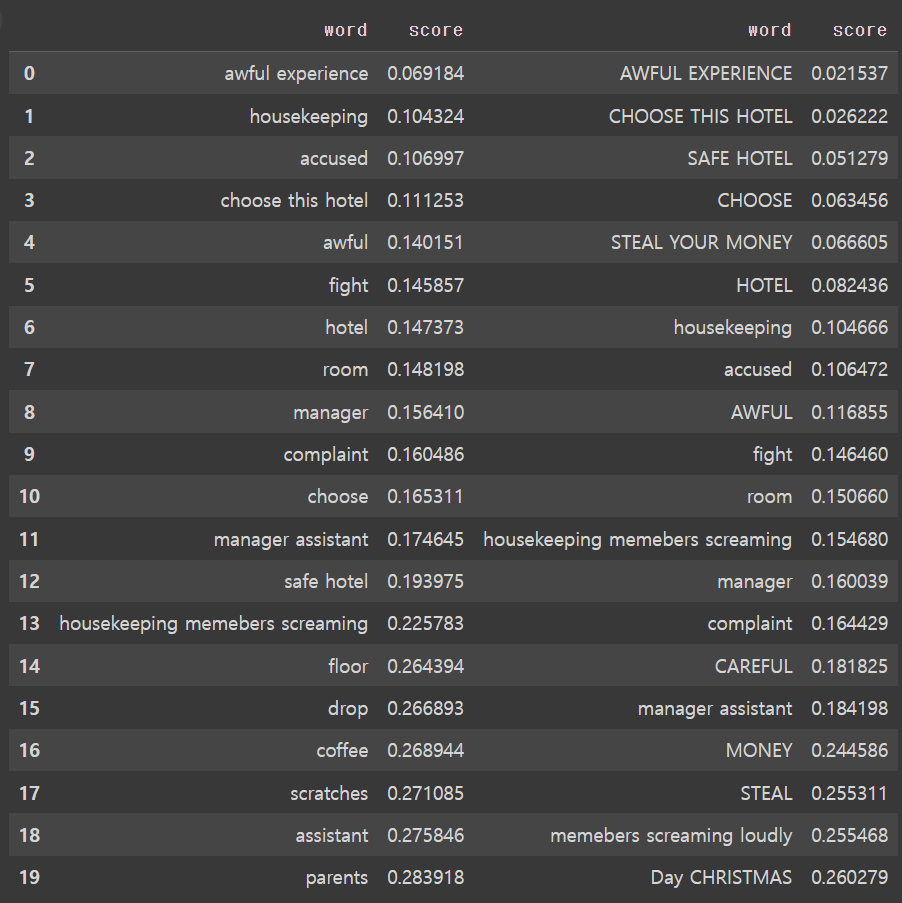

### Category 비어있는 경우
* business data에 category가 아예 null값인 경우, 리뷰 text를 통해 category를 유추할 수 있는지 확인
* 만일 유추 가능하다면, 우리가 타겟으로 잡은 Restaurant, Food Category는 몇 개인지 확인 후
* 유추한 카테고리로 데이터 안고 갈지, 예외처리로 뺄지 결정하고자 함

In [ ]:
# business, review 파일 ★전처리 전★ json 파일로 불러오기

review_og = pl.read_ndjson("your_path")
business_og = pd.read_json("your_path")

# date 컬럼 형식 변경
review_og = review_og.with_columns(pl.col("date").str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S"))

# 기간 필터링
start_year, end_year = 2017, 2021
review_og  = review_og.filter((pl.col("date").dt.year() >= start_year) & (pl.col("date").dt.year() <= end_year))

# pandas 형식으로 변환
review_og = review_og.to_pandas()

In [ ]:
no_cat = list(business_og[business_og["categories"].isna()]["business_id"])
rev_no_cat = review_og[review_og["business_id"].isin(no_cat)]
rev_no_cat= rev_no_cat.groupby("business_id").agg({
    "review_id" : "count",
    # "stars" : "mean",
    # "useful" : "sum",
    # "funny": "sum",
    # "cool" : "sum",
    "text" : lambda x: ", ".join(x)})
rev_no_cat

In [ ]:
# 카테고리와 무관할 것으로 보이는 keyword들 임의로 불용어 처리
stopwords_add = stopwords_list + ["great","great","helpful","good","choice","nice","place","big","friendly","large","selection","guy","amazing","expected","staff",
                                  "family","business","runs","Sam","glenda","Sam","owned","own","ever","suggestions","afternoon","showed","loaded","late","items","owner",
                                  "warranty","home","days","issue","wrong","work", "score","test","years","customer","cleaned","runaway","lost","shrunk","make","women","men",
                                  "francis","billing","account","Date","time","month","born","date","told","number","payment","bill","paid","worked","bro","sad","job","mind",
                                  "horrible","human","qmar","luke","price","highly","older","wife","husband","miss","back","finally","waste","company","recommend","call","week",
                                  "fabulous","week","rating","pictures","give","gave","show","returned","dec","wanted","want","idiots","stars","star"]

In [ ]:
# 임의 텍스트 추출
text = rev_no_cat["text"][14]
kw_extractor(text, 1, 3, 10, 0.4, "leve", stopwords_add)

In [ ]:
data = []
for idx, row in rev_no_cat.iterrows():
  text = row["text"]
  keyword = kw_extractor(text, 1, 3, 15, 0.4, "leve", stopwords_add)
  data.append( [ kw[0] for kw in keyword ] )  # keyword, score 중 keyword만 저장
data

In [ ]:
# 비즈니스별 리뷰에서 추출한 keyword 확인
rev_no_cat["keywords"] = data
rev_no_cat

* 상위 5개 키워드 이내로 카테고리 유추할 수 있었음

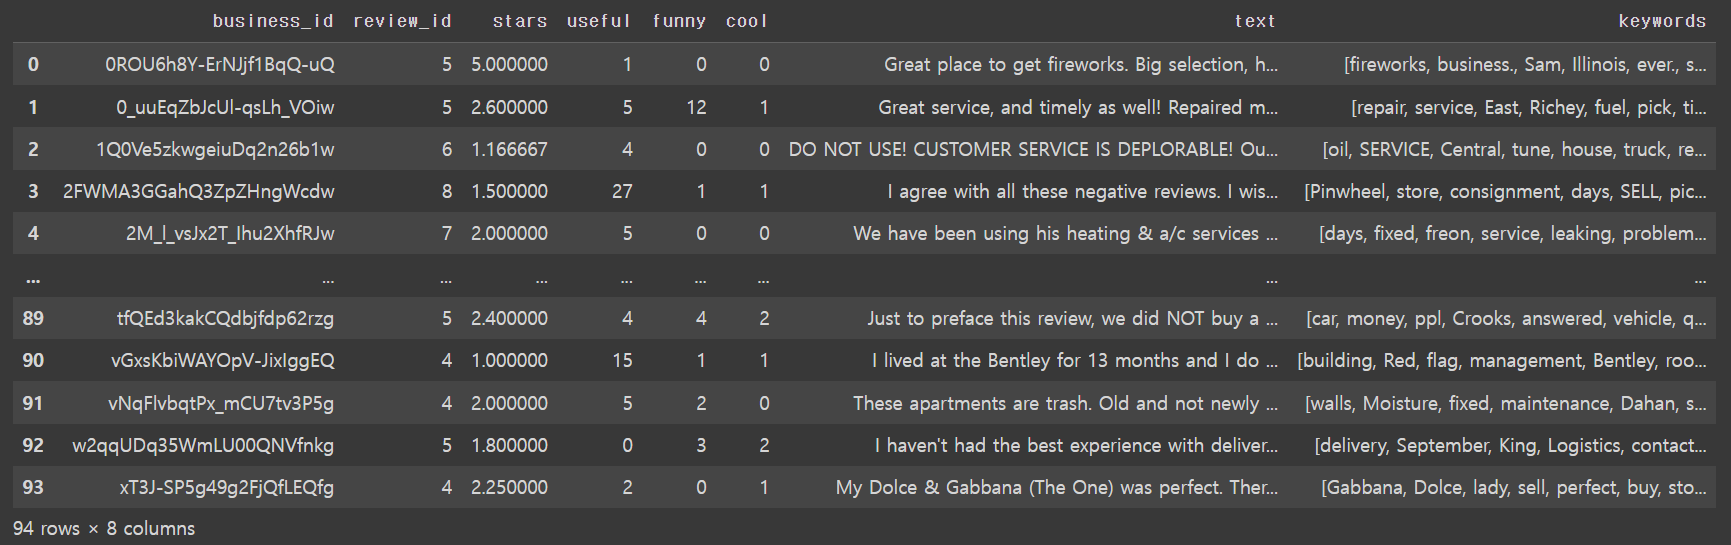

In [ ]:
# 검색 키워드 포함하는지 확인
def contains_keywords(words, keywords):
    for keyword in keywords:
        if any(keyword == word for word in words):
            return True
    return False

In [ ]:
# Restaurant, Food 와 관련된 주요 keyword들을 검색
search_keywords = ["food", "delicious", "steak", "lunch", "dinner", "dessert","bakery","bread","cream","meat","burger","pizza","eat"]
rev_no_cat[rev_no_cat["keywords"].apply(lambda x: contains_keywords(x, search_keywords))]

* 2개 비즈니스만 검색되었음을 알 수 있음
* 미미한 수지만 임의로 카테고리 부여하여 안고갈지, 동일하게 예외처리할지는 선택사항

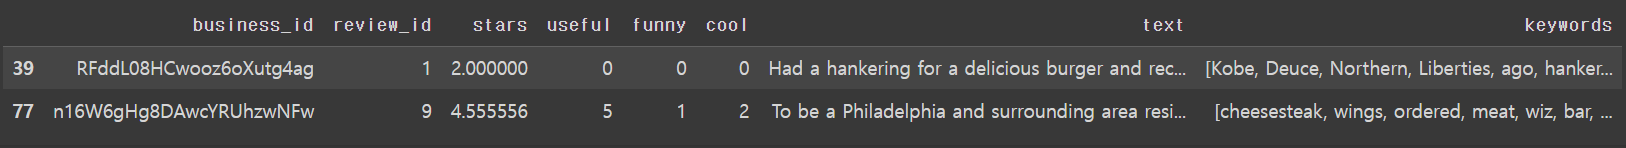

### [중간발표] 공통 리뷰 텍스트로 키워드 추출
* 팀원들 각자 살펴본 모델들을 비교하기 위해 공통 리뷰/가게별 키워드 추출 결과 공유

#### 1) 단일 리뷰 텍스트(길이가 긴 리뷰, 짧은 리뷰 모두 추출해보기)

In [ ]:
# 1-1) 5점 리뷰_long
long_text_5star = """
When I first heard about Alberta Avenue's Otto I couldn't help but draw comparisons to WVRST in Toronto. What I didn't expect is that Otto would be doing it better. Named Best Family Dining 2019 and Best Neighbourhood Gem 2020 by Avenue Magazine, this was a place that I had to try. Self-described as a neighbourhood meeting place, this restaurant is all about large communal tables and family-style plates. There's a German bierhalle type of vibe to the place but it's also more current than that. I visited on a Saturday evening and was excited to try it all!

The interior of the restaurant is laid-back and easy with blond woods, school house chairs, and giant white letters that spell OTTO on the cinder block wall. It's also bright and airy, with light flooding in from the open garage-style door. If you would prefer a total outdoor experience, you can opt to dine in their adjacent garden - which is gorgeous. Picnic tables are fully surrounded by a bounty of vegetable patches, fruit trees, and flowers. On a nice day, I could imagine no better place to enjoy a meal. Suffice to say, the garden is where I found myself seated.
The people working at Otto are very warm and friendly, clearly taking pride in their restaurant. The beautiful weather called for a cocktail and I easily chose the Cherry Gin Collins (Eau Claire cherry gin, sour cherries, lemon juice, sparkling water - $9.00)... I was sitting under a cherry tree, after all. Refreshing and playfully effervescent, this seemed like the ideal beverage. First, because gin is a bit of a "thing" at Otto, and second, the aforementioned cherry tree atmosphere. This drink was sweet and tart and I found that it went well with everything.
Speaking of gin, Otto does gin flights which feature four carefully curated varietals. What caught my eye is that one of the included gins is STUMP Coastal Forest Gin, a type that I have previously enjoyed. I'll need to try a flight the next time that I visit!

The main thing to eat is sausages, made fresh in-house, using responsibly sourced Alberta-only meat. The regular menu boasts five different types to choose from (there's even a vegan one!) and there are usually two or three special ones. There are also a bunch of sides to consider, six of them, and they all sound like excellent options as well. I began to build the perfect plate. Otto Sausage ($9.00), Smoked Mac & Cheese ($8.00 for small), Braised Red Cabbage ($7.00), and Brussel Sprouts ($7.00). The board arrived, laid out in all of it's appetizing glory. Of course I had to try the restaurant's namesake sausage (Sylvan Star smoked gouda, caraway and garlic). This sausage was delicious. It was incredibly juicy and simply oozing with cheese. So much flavour! Probably one of the best sausages that I've ever eaten and it had a lot to do with how well it was cooked (it wasn't dry at all). A must-order.
I was very impressed by each of the sides as well. They can sometimes end up as an afterthought but in this case each one of them was expertly prepared. The mac & cheese (with caramelized onion) was such a wonderful version of this simple dish. Super cheesy, each bite exploded with a smokey flavour that wasn't overdone. Maybe some of the best mac & cheese in town?? The red cabbage (caraway, clove and juniper) is a very traditional German dish that I happen to be obsessed with. It tastes like Christmas and this version was slightly bitter with a finish of warm spices. Lovely! Finally, the brussel sprouts (sautéed with sweet mustard glaze, apples and onions) were light and very fresh. The sweetness from the crisp apples created a beautiful balance. This whole entire board of food was a giant win in my books.

But there was more! We also ordered the Currywurst (The Allspiced Beef Bratwurst served with sweet curry sauce and garlic-herb fries - $18.00) from the Large Plates section of the menu because I ate currywurst in Berlin and loved it... And also because more sausages. So what is currywurst? It's a German fast food dish that consists of steamed then fried sausage, cut into bite-sized chunks, and served with curry ketchup on top. It is typically served with fries covered in mayo. The version at Otto is clearly a more elevated take on the dish, which I wasn't upset about. The only thing that I found myself missing was the specific preparation of steaming and frying the sausage. However, the bratwurst (onion, lemon and parsley) was quite tasty. Denser than the Otto, this one was packed with savoury bold flavours and was still juicy. The ketchup was promoted to a fresh curry sauce, similar to a homemade fruit ketchup with a spicy twist. Part of me missed the down 'n dirty regular ketchup (which they also can serve you!) but I can certainly appreciate that this was much nicer. The fries were great too, cooked to a perfect golden-brown.

It was imperative that I try Otto's Crème Brûlée ($8.00) because this is the dessert that they are known for. The feature flavour changes all the time. This
"""
a = kw_ex_default_stop(long_text_5star, 2, 1, 10, 0.3) # n_gram 2
b = kw_ex_default_stop(long_text_5star, 3, 2, 10, 0.3) # n_gram 3
compare_rank(a,b)

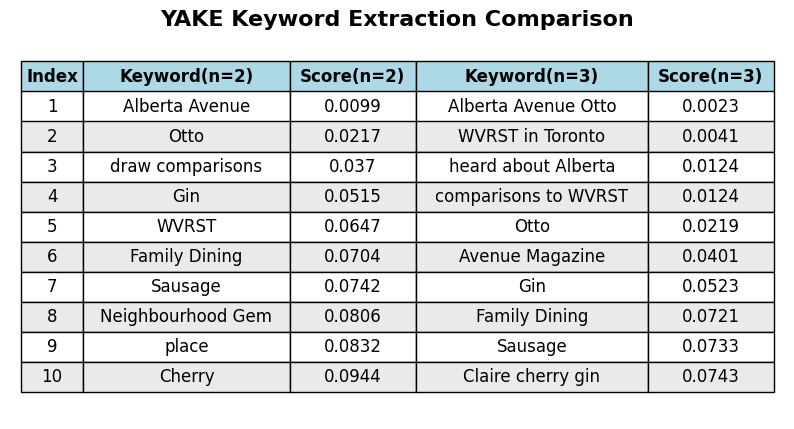

In [ ]:
# 1-2) 5점 리뷰_short
short_text_5star = """
Great food! The pizza and sandwiches are delicious. Great craft beer selection too! We go regularly.
"""
a = kw_ex_default_stop(short_text_5star, 2, 1, 10, "seqm", 0.3) # n_gram 2
b = kw_ex_default_stop(short_text_5star, 3, 2, 10, "seqm", 0.3) # n_gram 3
compare_rank(a,b)

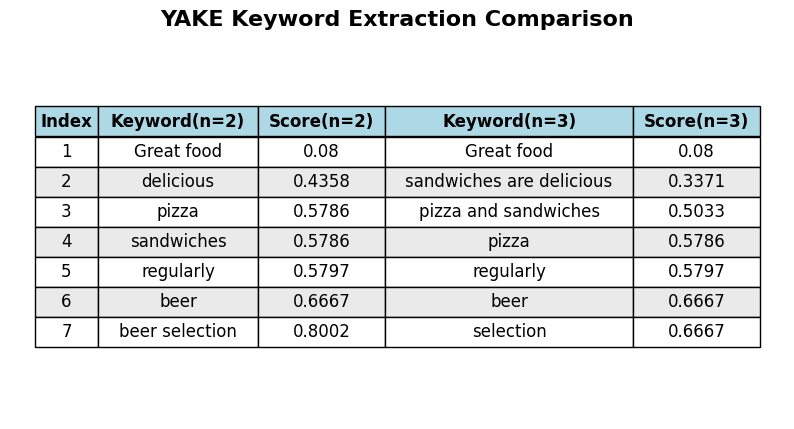

In [ ]:
# 1-3) 1점 리뷰_long
long_text_1star = """
Shortly after my first review, I was contacted by the manager of the establishment who was seemingly apologetic for my experience.  He offered to for me to come in for a do over, I initially declined but I figured giving a place a second chance to redeem themselves is not a bad idea.  He gave me the option of the making another reservation with a credit or sending me a gift card, I opted for the gift card, with the belief that if he knows when I'm coming I might not get the true experience, its like when you were in school and you knew it was parent visitation everyone would be on their best behavior, and yes while you want the best dining experience, I more appreciate the true one.  Well, I gave my info and was told the gift card would be in the mail the next day.  I hadn't received it but didn't really think any thing of it until I got a message from someone with a similarly bad experience a month later.  I contacted the manager just to check the status and was told it had been sent out, but he would send another out.  Well its been another month and nothing.. I don't much care as it really wasn't my idea to go back to begin with, but what's the point of the manager reaching out and offering if they aren't going to follow through. I can kind of now see why the staff doesn't take their job seriously.. Not great business practice, a shame...
Previous review below:
This one hurt.  I really had high hopes for this place, I made reservations over a week in advance, it was for a special occasion dinner, but in the end I truly regretting this selection.  I thought this was going to be a gem, it turned out to be a fail.  All the things that looks promising and led me to believe that out of the three options this was the place to go with were basically all that the place had to offer.  PA6 is a cute spot, the lay out is interesting and pleasing to the eyes. We walked in, the host was seating another party, and were seated on the second floor along the back wall, so I had a full view of the floor.  The host provided us with the menus and told us Oysters were a buck, score.  Our waitress came a few minutes later asking about drinks I asked for a drink menu but asked for some water in the meanwhile.  She came back with waters no drink menu, We ordered some oysters, and reminded her of the drink menu, my boyfriend could tell I was getting irritated, esp when I asked since I couldn't see the drink menu could I just have a pomegranate martini and she said no... that was it, no alternative, just no we don't make those.  Let me clarify, that the place was not crowded, she was not the only waitress on our floor or between floor, the issue is that she was more concerned with her phone than her patrons.  I knew this was going to continue to be an issue which is why I should have went with my instincts then and just cut it at the oysters and went elsewhere. The oysters were delicious, although I was only able to pair it with water at that moment -_-
I mulled over the menu, I knew I wanted to try the duck fat fries.. that and the oysters I knew were must haves.. I opted for the mini lobster rolls which came with a side of fries.  He was not interested in giving duck fat fries a chance and asked our waitress what comes on the salad, she answered lettuce, carrots, very simple he says perfect thats all I want on it with shrimp.  She doesn't write it down and I cringe when I notice she heads to the cabinet and opens the drawer to get her phone rather than put our order in.. long sigh. Oh we finally get the drink menu, I just ordered a beer, so we are chatting it up drink our beverages, the host comes up with our meals, he asks about the lobster roll, I say me, and he places a plate with chicken and salad in front of him, I say, didn't you order shrimp, he says yes, the host looks uncomfortable and takes up the plate and says he will have the correct salad out in a few minutes, and he says is that cheese on the salad proudly the host says yes, he's says please do not put it on the next one.  Now here is what pisses me off, he says well it's on the menu that it's in the salad.  Now first of all, he did not take the order so he has no idea what the conversation was with the waitress, but even still she already messed up the order and gave chicken instead of shrimp and no apology was given you want to talk about what's on the menu.  Woosah! so I calmly but sternly advise him that that that is not how it was ordered just like it wasn't ordered with chicken.  So instead of him asking what the order was, he walks off, I'm sure you all are wondering where our waitress is, since she was obviously too busy to find out what the issue was, oh yes she was definitely busy, busy on her phone not attending to her other tables.
At this point I lost my appetite, so I couldn't tell you how the duck fries were or the mini lobster rolls, I will tell you that when his order came out it was still wrong.  We didn't eat and it took about 25 minutes b
"""
a = kw_ex_default_stop(long_text_1star, 2, 1, 10, 0.3) # n_gram 2
b = kw_ex_default_stop(long_text_1star, 3, 2, 10, 0.3) # n_gram 3
compare_rank(a,b)

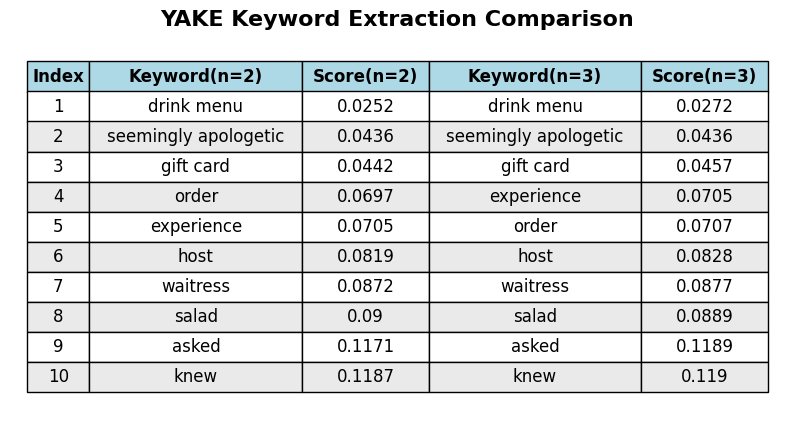

In [ ]:
short_text_1star ="""
Trash trying to call themselves as food, owner is ignorant, food is trash and place just need a redo
"""
a = kw_ex_default_stop(short_text_1star, 2, 1, 10, 0.3) # n_gram 2
b = kw_ex_default_stop(short_text_1star, 3, 2, 10, 0.3) # n_gram 3
compare_rank(a,b)

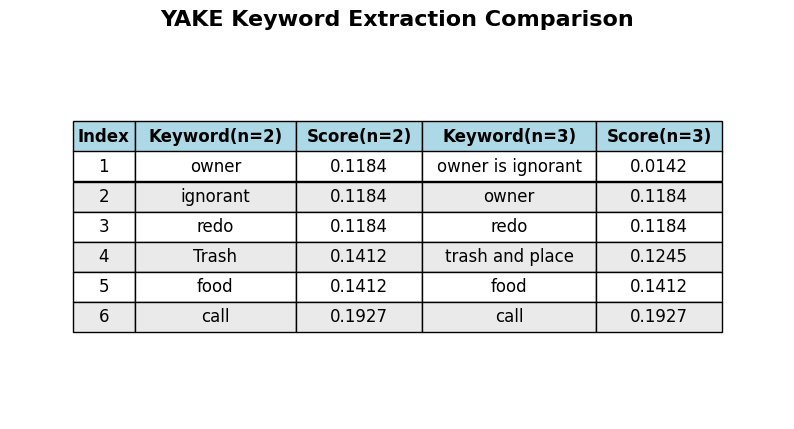

> **Result**

* 2-gram과 3-gram간 차이가 크진 않지만 2-gram일 때 좀 더 직관적인 파악이 가능하다고 판단되며, 3-gram 이상은 구문 단위로 분석 시 유의미할 것으로 보임
* short text는 너무 짧은 관계로 10개까지 추출되지 않음

#### 2) 특정 가게 리뷰 키워드 추출(가장 리뷰 많은 가게와 적은 가게)

In [ ]:
# review & business join
rev_biz = pd.merge(review, business, how = "inner", on="business_id")
rev_biz = rev_biz.sort_values("date", ascending = False) # 시간순 정렬
# print(rev_biz.columns)
rev_biz.head()

In [ ]:
rev_biz_check = rev_biz.groupby("business_id").agg({
                                "review_count_biz" : "mean",
                                "average_stars_biz" :"mean",
                                "user_id" : "count",
                                "date" : lambda x : ", ".join(x),
                                # datetime format으로 변경 안 됐을 경우 위 코드 주석 처리 후
                                # 아래 코드로 주석 풀고 실행
                                # "date" : lambda x : ", ".join(x.dt.strftime('%Y-%m-%d %H:%M:%S')),
                                "text" : lambda x: ", ".join(x)
                                }).reset_index()
# rev_biz_check

In [ ]:
# 2-1) review 수 가장 많은 가게

biz = business.sort_values("review_count_biz",ascending=False).head(1)
biz_id = biz["business_id"].values[0]  # 90484

review_max = review[review["business_id" == biz_id ].sort_values("date", ascending = False).head(1000)  # 최신 1000개로 자르기
text_max = list(rev_biz_check[rev_biz_check["business_id"] == biz_id ]["text"])[0]
text_max

In [ ]:
kw_extractor(text_max, 3, 2, 10, "leve", 0.4) # 3-gram 기준

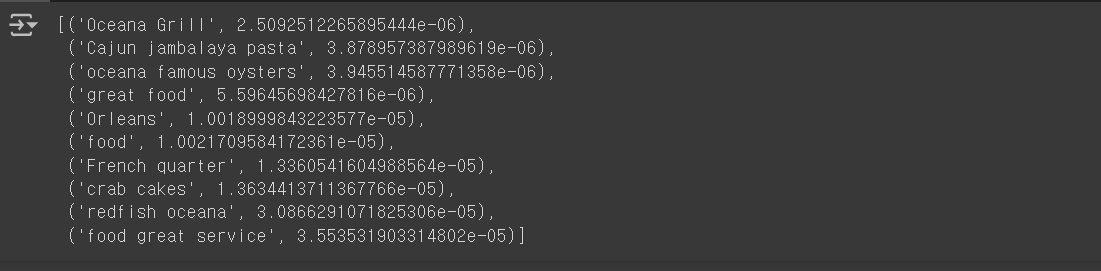

In [ ]:
# 2-2) review 수 최소 기준(5개)에 맞춰 임의 가게 선정

business[business["review_count_biz"]==5]

In [ ]:
biz_id = 133331
text_min = list(rev_biz_check[rev_biz_check["business_id"]==biz_id]["text"])[0]
text_min

In [ ]:
kw_extractor(text_min, 3, 2, 10, 0.4, "leve") # 3-gram 기준

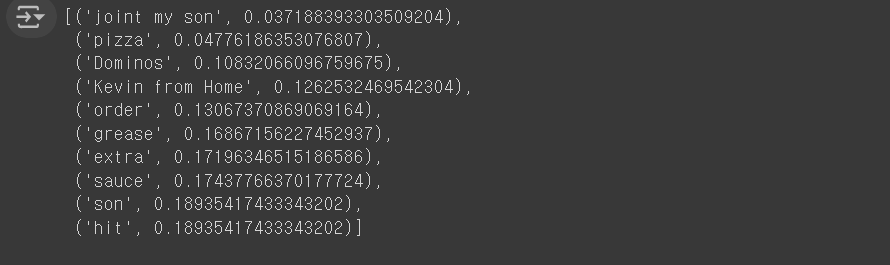

>**Result**

* 리뷰가 적건 많건 단편적인 키워드 추출이 한계로 보이는 점이 아쉬움
* 상위 5개 키워드 안에 상호명, 메뉴와 관련된 키워드가 최소 1개씩 포함되긴 함
* text를 통으로 묶어 빈도 기반으로 추출된 키워드이기에 분석에 한계 있을 수밖에 없음

  -> NER, PoS 등 고려할 필요 있음

# **2. KBIR**
* pre-trained model 허깅페이스에서 불러와 추출 시도
* keyword extractor + keyword generator(BART) 혼합된 모델로 확인됨
* 연관성 높은 keyword 추출에 강하긴 하나, science 분야 논문 데이터 위주로 학습되어 해당 도메인에 특히 성능 좋은 것으로 보임


In [ ]:
# https://huggingface.co/ml6team/keyphrase-extraction-kbir-inspec

In [ ]:
from transformers import (
    TokenClassificationPipeline,
    AutoModelForTokenClassification,
    AutoTokenizer,
)
from transformers.pipelines import AggregationStrategy
import numpy as np

# Define keyphrase extraction pipeline
class KeyphraseExtractionPipeline(TokenClassificationPipeline):
    def __init__(self, model, *args, **kwargs):
        super().__init__(
            model=AutoModelForTokenClassification.from_pretrained(model),
            tokenizer=AutoTokenizer.from_pretrained(model),
            *args,
            **kwargs
        )

    def postprocess(self, all_outputs):
        results = super().postprocess(
            all_outputs=all_outputs,
            aggregation_strategy=AggregationStrategy.SIMPLE,
        )
        return np.unique([result.get("word").strip() for result in results])

In [ ]:
model_name = "ml6team/keyphrase-extraction-kbir-inspec"
extractor = KeyphraseExtractionPipeline(model=model_name)

### Category별 키워드 추출
* 최근 3개월 리뷰 중 별점 높은 리뷰들 필터링하여 추천 키워드 뽑을 수 있지 않을까

In [ ]:
rev_biz['category_str'] = rev_biz['category'].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else str(x))

In [ ]:
# 최근 n개월 리뷰 중 특정 별점 이상 리뷰들만 필터링하는 함수
def text_in_category(df, months, star, category):

  recent_date = max(df[df["category_str"]== category]["date"])
  n_months_ago = recent_date - timedelta(days=months*30)

  recent_reviews = df[(rev_biz["category_str"]==category) & (rev_biz['date'] >= n_months_ago)&(rev_biz['stars_x'] > star)]
  text = ", ".join(recent_reviews["text"])
  return text

In [ ]:
text = text_in_category(rev_biz, 3, 3, "Restaurants, Mexican")
keyphrases = extractor(text)
print(len(text))
print(keyphrases)

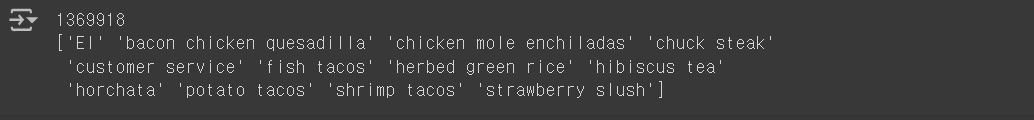

In [ ]:
text = text_in_category(rev_biz, 3, 3, "Restaurants, Korean")
keyphrases = extractor(text)
print(len(text))
print(keyphrases)

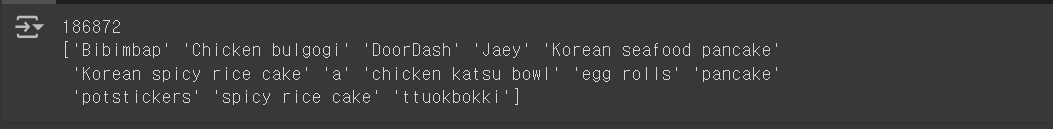

In [ ]:
text = text_in_category(rev_biz, 3, 3, 'Food, Food Trucks')
keyphrases = extractor(text)
print(len(text))
print(keyphrases)

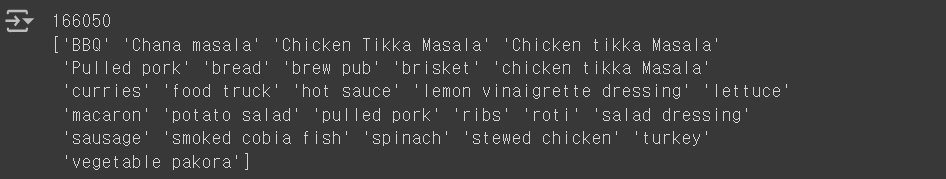

>**Result**

* 주로 해당 카테고리의 '메뉴'와 관련된 키워드들이 추출됨
* 카테고리마다 추출되는 keyword 개수가 눈에 띄게 차이나는 경우가 있는데, 어떤 요인인지 파악해볼 필요


### 가게별 키워드 추출

In [ ]:
# 임의로 한 가게 리뷰 요약해보기
biz_id = 123
text = ", ".join(list(rev_biz[rev_biz["business_id"]==biz_id]["text"]))
keyphrases = extractor(text)
print(len(text))
print("NAME :",list(rev_biz[rev_biz["business_id"]==n]["name"].head(1))[0])
print("CATEGORY :",list(rev_biz[rev_biz["business_id"]==n]["category_str"].head(1))[0])
print(keyphrases)

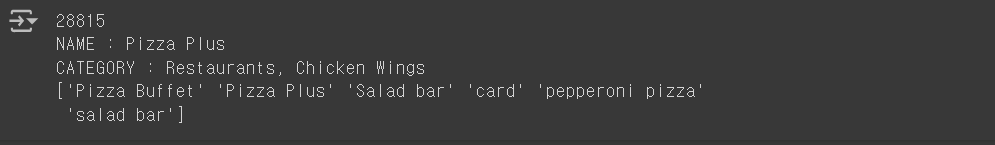

In [ ]:
biz_id = 716
text = ", ".join(list(rev_biz[rev_biz["business_id"]==biz_id]["text"]))
keyphrases = extractor(text)
print(len(text))
print("NAME :",list(rev_biz[rev_biz["business_id"]==n]["name"].head(1))[0])
print("CATEGORY :",list(rev_biz[rev_biz["business_id"]==n]["category_str"].head(1))[0])
print(keyphrases)

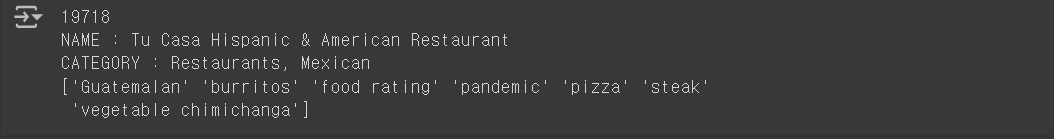

In [ ]:
biz_id = 38752
text = ", ".join(list(rev_biz[rev_biz["business_id"]==biz_id]["text"]))
keyphrases = extractor(text)
print(len(text))
print("NAME :",list(rev_biz[rev_biz["business_id"]==n]["name"].head(1))[0])
print("CATEGORY :",list(rev_biz[rev_biz["business_id"]==n]["category_str"].head(1))[0])
print(keyphrases)

* McDonald's인데 부정적 키워드 단 1개만 뽑힘..! (위생법 위반)
* 해당 business_id로 가게 정보 조회해보니 평점 1.0으로 굉장히 평판이 안좋은 지점이었던 점이 흥미로웠음

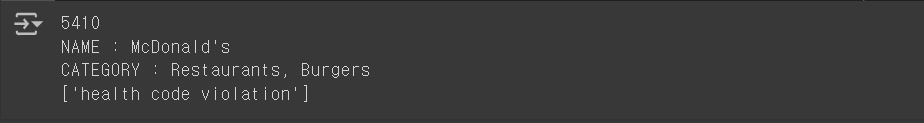

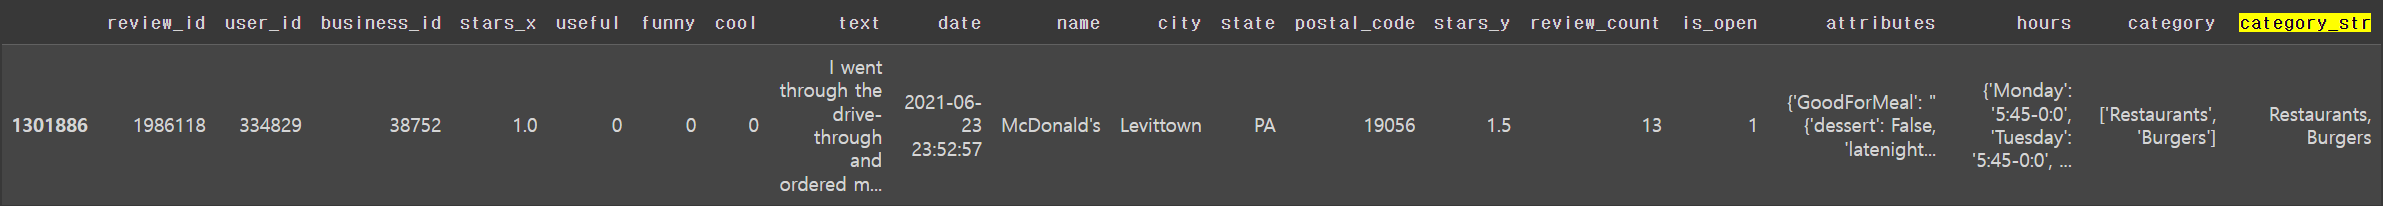

>**Result**

* 가게별로 추출했을 때도 '메뉴'와 관련된 키워드들이 추출되는 경향
* 긍/부정적 평판이 극단적일 경우에는 키워드 추출에도 영향을 미치는 것으로 파악
* 다만, pre-trained 모델을 파인튜닝하는 추가 작업이 필요하거나 모델 자체가 안 돌아갈 수 있다는 한계점 존재
